# CSCE5222.002 Assignment 2 <br>
Please download the images from the following link for this assignment <br>
https://drive.google.com/drive/folders/1LPspbBBDsvf5BdGdVrbMFHpqhH0yF8mg?usp=sharing <br>
The main purpose of this assignment is image retrieval. You will find 4 target images search_1.jpg to search_4.jpg and 50 data images from 1.jpg to 50.jpg. <br> **Try to retrieve the 5 most similar images from the data images to the target images, respectively, and display them.** <br>
Please refer to the following link for a simple application using VGG-16 for image retrieval. You can modify the feature extraction method for your assignment, or you can have your own code for this assignment.<br>
https://towardsdatascience.com/build-an-image-search-engine-using-python-ad181e76441b?gi=3714e721bc0 <br>
**Note: if you are required to pay for reviewing, please use a different browser to review it.**

## Task 1. Using only 1 feature descriptor for image retrieval
Please use only one feature descriptor for image retrival, for instance color layout feature, HOG feature, etc. <br>
**Note: if you are using the features like HOG, you may need to use correlation to measure the similarity.**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
path = '/content/drive/MyDrive/Courses/Feature Engneering/Project/cassava-leaf-disease-classification.zip (Unzipped Files)/'

In [3]:
import math
import os
from os import listdir
import cv2
import numpy as np
from abc import ABCMeta, abstractmethod
#write your code here
import sys
# Import the libraries
import matplotlib.pyplot as plt
from PIL import Image

In [5]:
class DescriptorComputer:
	__metaclass__ = ABCMeta
	
	@abstractmethod
	def compute(self, frame):
		pass

class ColorLayoutComputer(DescriptorComputer):
	
	def __init__(self):
		self.rows = 8
		self.cols = 8
		self.prefix = "CLD"
		
	def compute(self, img):
		averages = np.zeros((self.rows,self.cols,3))
		imgH, imgW, _ = img.shape
		for row in range(self.rows):
			for col in range(self.cols):
				slice = (img[int(imgH/self.rows * row): int(imgH/self.rows * (row+1)), int(imgW/self.cols*col) : int(imgW/self.cols*(col+1))])
				average_color_per_row = np.mean(slice, axis=0)
				average_color = np.mean(average_color_per_row, axis=0)
				average_color = np.uint8(average_color)
				averages[row][col][0] = average_color[0]
				averages[row][col][1] = average_color[1]
				averages[row][col][2] = average_color[2]
		icon = cv2.cvtColor(np.array(averages, dtype=np.uint8), cv2.COLOR_BGR2YCR_CB)
		y, cr, cb = cv2.split(icon)
		dct_y = cv2.dct(np.float32(y))
		dct_cb = cv2.dct(np.float32(cb))
		dct_cr = cv2.dct(np.float32(cr))
		dct_y_zigzag = []
		dct_cb_zigzag = []
		dct_cr_zigzag = []
		flip = True
		flipped_dct_y = np.fliplr(dct_y)
		flipped_dct_cb = np.fliplr(dct_cb)
		flipped_dct_cr = np.fliplr(dct_cr)
		for i in range(self.rows + self.cols -1):
			k_diag = self.rows - 1 - i
			diag_y = np.diag(flipped_dct_y, k=k_diag)
			diag_cb = np.diag(flipped_dct_cb, k=k_diag)
			diag_cr = np.diag(flipped_dct_cr, k=k_diag)
			if flip:
				diag_y = diag_y[::-1]
				diag_cb = diag_cb[::-1]
				diag_cr = diag_cr[::-1]
			dct_y_zigzag.append(diag_y)
			dct_cb_zigzag.append(diag_cb)
			dct_cr_zigzag.append(diag_cr)
			flip = not flip
		return np.concatenate([np.concatenate(dct_y_zigzag), np.concatenate(dct_cb_zigzag), np.concatenate(dct_cr_zigzag)])


In [8]:
list_image=os.listdir(path+'train_images/')
list_image=sorted(list_image)
for img_path in list_image:
    # Extract Features
  if(img_path[0]=='s' or img_path.endswith('.npy')):
    continue
  computer = ColorLayoutComputer()
  
  img=cv2.imread(path+"train_images/"+img_path)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  feature = computer.compute(img)
  feature_path = path+'feature_clr/'+img_path+".npy"
  np.save(feature_path, feature)

In [9]:
def distance_measuere_L2(a,b):
  #L2 distance
  norm = np.linalg.norm(a)
  norm = np.linalg.norm(b)
  normal_array = b/norm
  normal_array1 = a/norm
  L2=np.linalg.norm(normal_array1-normal_array)
  return L2

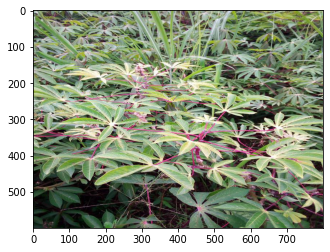

In [20]:

# Insert the image query
searchs=['2216849948.jpg']
for s in searchs:
  img = Image.open(path+'test_images/'+s)
  # Extract its features
  
  plt.imshow(img)
  plt.show()
  img=cv2.imread(path+'test_images/'+s)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  query2  = computer.compute(img)
  
  # Python3 code to demonstrate list
  # concatenation using list comprehension 
  # using list comprehension to concat
  # query = [y for x in [query1, query2] for y in x]
  query=(query2).reshape(1,-1)
  # Calculate the similarity (distance) between images
  dists=[]
  lowest_dist=100000
  predict=''
  for feature_path in os.listdir(path+'feature_clr/'):
    feature_load=np.load(path+'feature_clr/'+feature_path)
    L2=distance_measuere_L2(feature_load,query)
    if(L2<lowest_dist):
      lowest_dist=L2
      predict=feature_path

In [21]:
predict

'624542244.jpg.npy'

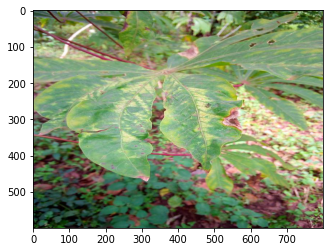

In [22]:
predict_img = Image.open(path+'train_images/'+predict[:-4])
plt.imshow(predict_img )
plt.show()

most similar picture label 2


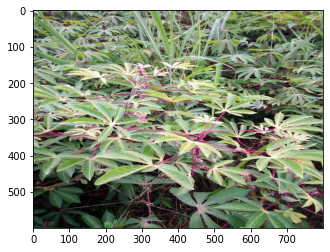

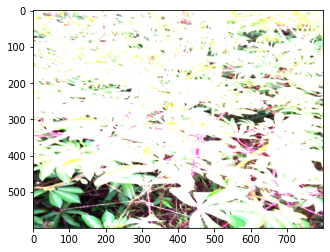

In [16]:
#write your code here
from skimage.transform import rescale
from skimage.color import rgb2gray
for s in searchs:
  img = cv2.imread(path+'test_images/'+s)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  # img=img/255.0
  plt.imshow(img)
  plt.show()
  # Gaussian Blur 3x3
  kernel1 = np.array([[1, 0, 0],
                                  [0, 1, 0],
                                  [0, 0, 1]])

  #use filter2D to apply convolution
  res= cv2.filter2D(img,-1,kernel1, borderType=cv2.BORDER_CONSTANT)   
  # detecting diagnoal
  plt.imshow(res)
  plt.show()


  query2  = computer.compute(res)
  
  # Python3 code to demonstrate list
  # concatenation using list comprehension 
  # using list comprehension to concat
  query=(query2).reshape(1,-1)
  # Calculate the similarity (distance) between images
  # dists=(np.linalg.norm(np.array(concated_features)- np.array(query), axis=1))
  dists=[]
  lowest_dist=10000
  predict=''
  for feature_path in os.listdir(path+'feature_clr/'):
    feature_load=np.load(path+'feature_clr/'+feature_path)
    L2=distance_measuere_L2(feature_load,query)
    if(L2<lowest_dist):
      lowest_dist=L2
      predict=feature_path

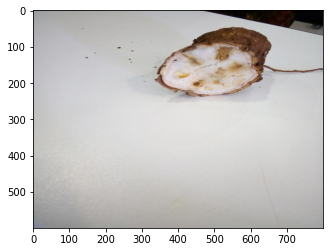

In [17]:
predict_img = Image.open(path+'train_images/'+predict[:-4])
plt.imshow(predict_img )
plt.show()

In [19]:
predict

'2719114674.jpg.npy'

most similar picture label 1